In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 

In [2]:
import os 
os.chdir('/home/akhilbvs/Kaggle/zoo-animal-classification')

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
animals=pd.read_csv('zoo.csv')
animal_class=pd.read_csv('class.csv')

In [5]:
animals.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [6]:
animal_class

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [7]:
animals.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [8]:
sorted(animals['class_type'].unique())

[1, 2, 3, 4, 5, 6, 7]

In [9]:
data_set=pd.merge(left=animals,right=animal_class,how='left',left_on='class_type',right_on='Class_Number')

In [10]:
data_set.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


(array([41., 20.,  5., 13.,  4.,  8., 10.]),
 array([1.        , 1.85714286, 2.71428571, 3.57142857, 4.42857143,
        5.28571429, 6.14285714, 7.        ]),
 <a list of 7 Patch objects>)

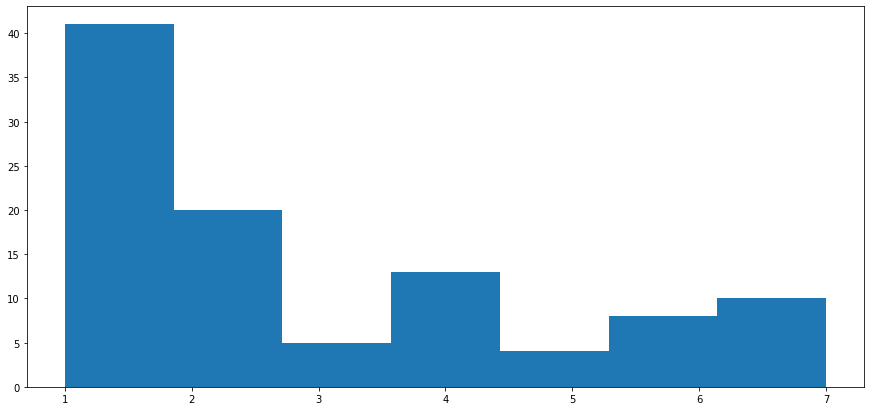

In [11]:
plt.figure(figsize=(15,7))
plt.hist(x=data_set.class_type,bins=7)

<Figure size 1080x504 with 0 Axes>

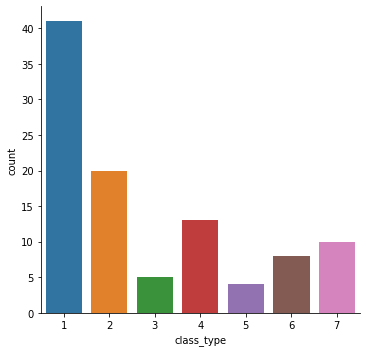

In [12]:
plt.figure(figsize=(15,7))
sns.factorplot('class_type',data=data_set,kind='count')
plt.show()

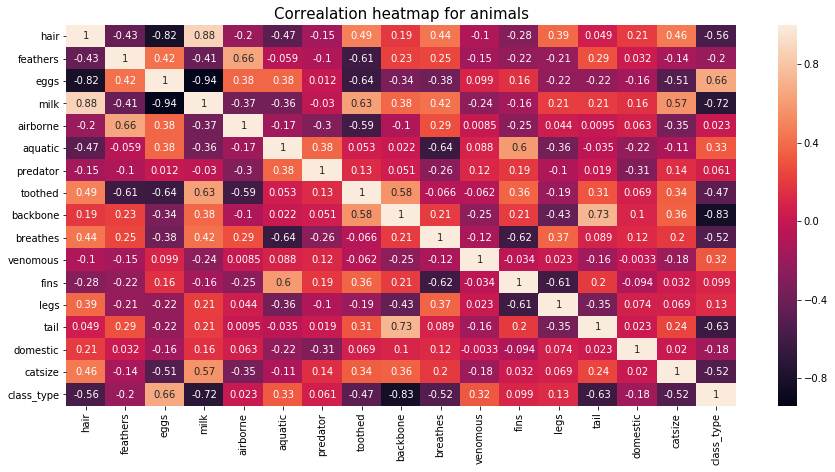

In [13]:
plt.figure(figsize=(15,7))
corr = animals.corr()
sns.heatmap(corr, annot=True,xticklabels=corr.columns.values,yticklabels=corr.columns.values)
plt.title('Correalation heatmap for animals',size=15)
plt.show()

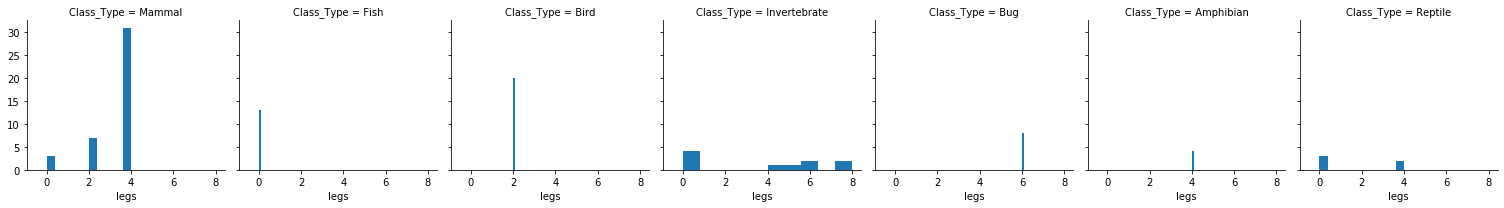

In [14]:
grid=sns.FacetGrid(data=data_set,col='Class_Type')
grid.map(plt.hist,'legs')
plt.show()

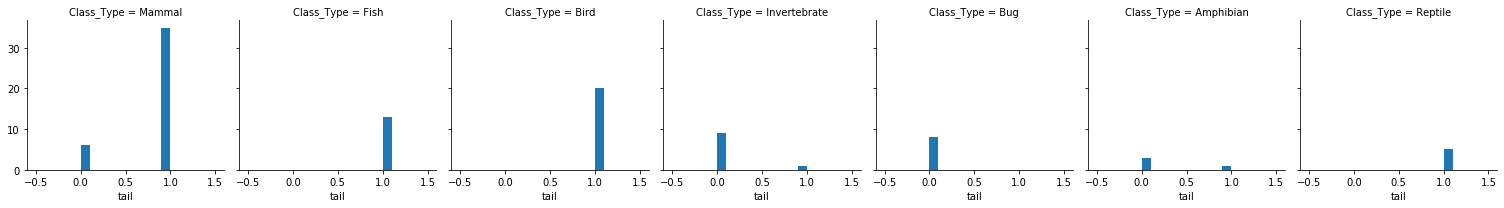

In [15]:
grid=sns.FacetGrid(data=data_set,col='Class_Type')
grid.map(plt.hist,'tail')
plt.show()

In [16]:
x = animals.iloc[:,1:17]
y = animals.iloc[:,17]

In [17]:
from sklearn.cross_validation import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

In [18]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

In [19]:
#Classification using Logistic Regression model

In [20]:
from sklearn.linear_model import LogisticRegression
LRmodel=LogisticRegression(random_state=0)
LRmodel.fit(x_train,y_train)
y_predlr=LRmodel.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score_lr=accuracy_score(y_test,y_predlr)

In [22]:
print('Logistic Regression accuracy :{}'.format(accuracy_score_lr))

Logistic Regression accuracy :0.967741935483871


In [23]:
#Classification using K Nearest Neighbours

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_predknn=knn.predict(x_test)

In [25]:
accuracy_score_knn=accuracy_score(y_test,y_predknn)

In [26]:
print('K Nearest Neighbours accuracy is {}'.format(accuracy_score_knn))

K Nearest Neighbours accuracy is 0.967741935483871


In [27]:
from sklearn.svm import SVC
svm=SVC(kernel='linear',random_state=0)
svm.fit(x_train,y_train)
y_predsvm=svm.predict(x_test)

In [28]:
accuracy_score_svm=accuracy_score(y_test,y_predsvm)

In [29]:
print('Support Vector Machine(SVM) accuracy:{}'.format(accuracy_score_svm))

Support Vector Machine(SVM) accuracy:0.967741935483871


In [30]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_prednb=nb.predict(x_test)

In [31]:
accuracy_score_nb=accuracy_score(y_test,y_prednb)

In [32]:
print('Naive Bayes accuracy:{}'.format(accuracy_score_nb))

Naive Bayes accuracy:0.9354838709677419


In [33]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion='gini',random_state=0)
tree.fit(x_train,y_train)
y_predtree=tree.predict(x_test)

In [34]:
accuracy_score_tree=accuracy_score(y_test,y_predtree)

In [35]:
print('Decision tree accuracy:{}'.format(accuracy_score_tree))

Decision tree accuracy:0.9354838709677419


In [36]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(random_state=0,n_estimators=10,criterion='gini')
forest.fit(x_train,y_train)
y_predforest=forest.predict(x_test)

In [37]:
accuracy_score_forest=accuracy_score(y_test,y_predforest)

In [38]:
print('Random Forest accuracy:{}'.format(accuracy_score_forest))

Random Forest accuracy:0.967741935483871


In [39]:
classification_models=['Linear Regression','K Nearest Neighbours','SVM','Naive Bayes','Decision Tree','Random Forest']
model_accuracy=[accuracy_score_lr,accuracy_score_knn,accuracy_score_svm,accuracy_score_nb,accuracy_score_tree,accuracy_score_forest]

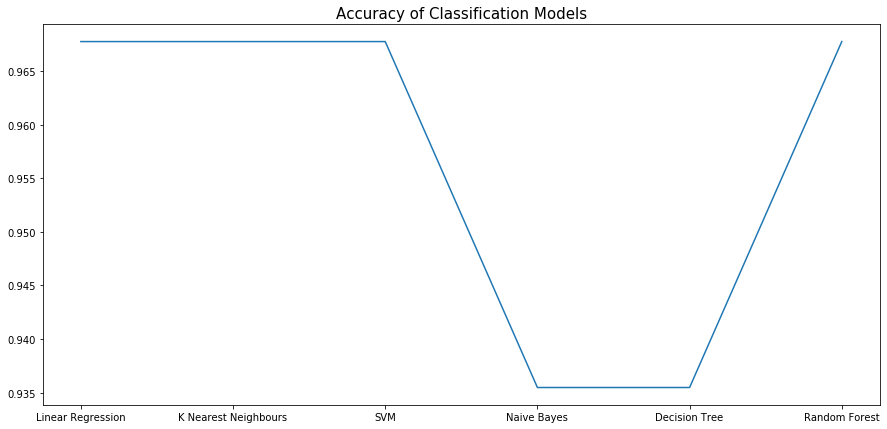

In [40]:
plt.figure(figsize=(15,7))
plt.plot(classification_models,model_accuracy)
plt.title('Accuracy of Classification Models',size=15)
plt.show()